# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# Creating an empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the process of call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=pisco
Processing Record 2 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=atuona
Processing Record 3 | Zyryanovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=zyryanovsk
Processing Record 4 | Maria Aurora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=maria aurora
Processing Record 5 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=vaini
Processing Record 6 | Abonnema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=abonnema
Processing Record 7 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 57 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=prince rupert
Processing Record 58 | Povenets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=povenets
City not found. Skipping...
Processing Record 59 | Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=praia da vitoria
Processing Record 60 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=ostrovnoy
Processing Record 61 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=puerto ayora
Processing Record 62 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=dingle
Processing Record 63 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/we

Processing Record 112 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=hofn
Processing Record 113 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=lebu
Processing Record 114 | Marathon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=marathon
City not found. Skipping...
Processing Record 115 | Itaituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=itaituba
Processing Record 116 | Sao Paulo do Potengi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=sao paulo do potengi
Processing Record 117 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=saint-philippe
Processing Record 118 | Horni Plana
http://api.openweathermap.org/data/2.5/weather

Processing Record 168 | Hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=hovd
Processing Record 169 | Rayong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=rayong
Processing Record 170 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=ancud
Processing Record 171 | Starominskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=starominskaya
Processing Record 172 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=komsomolskiy
Processing Record 173 | Ngaoundere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=ngaoundere
Processing Record 174 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293f

Processing Record 224 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=salalah
Processing Record 225 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=kodiak
Processing Record 226 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=lata
City not found. Skipping...
Processing Record 227 | Atambua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=atambua
City not found. Skipping...
Processing Record 228 | Ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=ayan
Processing Record 229 | Portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=portland
Processing Record 230 | Caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 279 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=souillac
City not found. Skipping...
Processing Record 280 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=tautira
Processing Record 281 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=vila velha
Processing Record 282 | Yinchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=yinchuan
Processing Record 283 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=baykit
Processing Record 284 | Guerrero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=guerrero
City not found. Skipping...
Processing Record 285 | Mrakovo
http://api.openweathermap.org/data/2.5/weath

Processing Record 334 | Batemans Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=batemans bay
Processing Record 335 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=mehamn
Processing Record 336 | Guasdualito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=guasdualito
Processing Record 337 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=faya
Processing Record 338 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=faanui
Processing Record 339 | Corn Island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=corn island
Processing Record 340 | Billings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293

Processing Record 389 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=port macquarie
Processing Record 390 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=meulaboh
Processing Record 391 | La Asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=la asuncion
Processing Record 392 | Salym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=salym
Processing Record 393 | Mumford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=mumford
Processing Record 394 | Sesheke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=sesheke
City not found. Skipping...
Processing Record 395 | Kirksville
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 445 | Newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=newport
Processing Record 446 | Blagodatnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=blagodatnoye
Processing Record 447 | Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=labuhan
Processing Record 448 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=severo-kurilsk
Processing Record 449 | Zulueta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=zulueta
Processing Record 450 | Kalachinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=kalachinsk
Processing Record 451 | Pemberton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629

Processing Record 501 | Svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=svetlogorsk
Processing Record 502 | Vila do Maio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=vila do maio
Processing Record 503 | Paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=paita
Processing Record 504 | Landerneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=landerneau
Processing Record 505 | Camopi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=camopi
Processing Record 506 | Maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=maldonado
Processing Record 507 | Dauphin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e59

Processing Record 557 | Islamkot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=islamkot
Processing Record 558 | Benalla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=benalla
Processing Record 559 | Sturlic
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=sturlic
Processing Record 560 | Itacare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46c1c32629212b600e599b293fab260f&q=itacare


In [45]:
# Create a dictonary using the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weatherPy_df = pd.DataFrame(weatherpy_dict)
weatherPy_df

# Display count of weather data values 
weatherPy_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [46]:
# Save data frame to CSV
weatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
weatherPy_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pisco,0,PE,1552233600,30,-13.71,-76.20,71.60,8.05
1,Atuona,64,PF,1552236516,100,-9.80,-139.03,82.12,10.31
2,Zyryanovsk,88,KZ,1552236518,84,49.74,84.27,23.35,1.25
3,Maria Aurora,24,PH,1552236519,96,15.80,121.47,66.59,1.48
4,Vaini,0,IN,1552236521,83,15.34,74.49,70.06,3.09
5,Abonnema,8,NG,1552236522,63,4.71,6.79,83.29,9.42
6,Carnarvon,0,ZA,1552236523,18,-30.97,22.13,65.02,9.75
7,Kapaa,75,US,1552236322,78,22.08,-159.32,71.60,14.99
8,Clyde River,1,CA,1552233600,75,70.47,-68.59,-14.81,5.82
9,San Luis,80,AR,1552236527,51,-33.30,-66.34,70.87,5.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

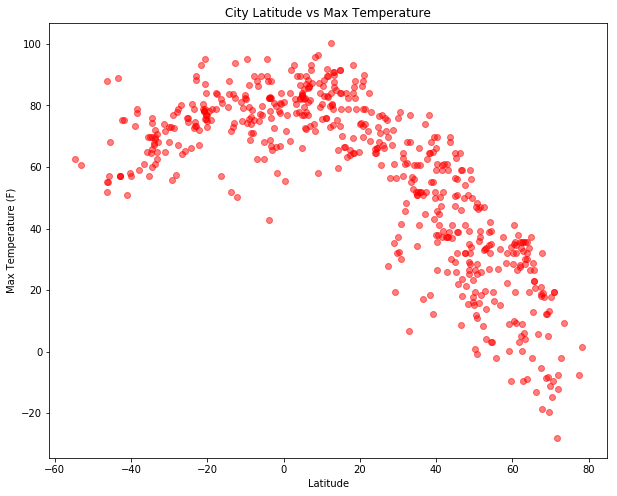

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(weatherPy_df["Lat"], weatherPy_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature')
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

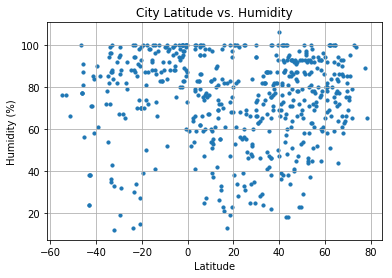

In [48]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

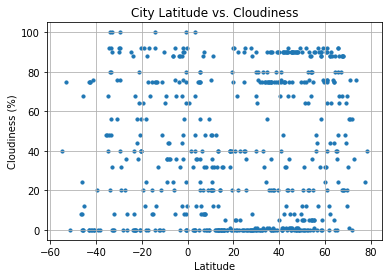

In [49]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

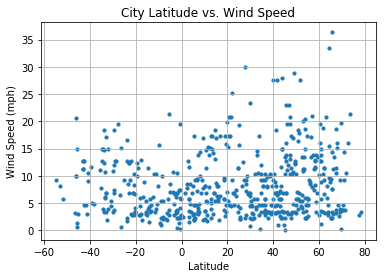

In [50]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()
